# Feature selection using the Boruta-SHAP package

Feature selection (taken from [Wikipedia](https://en.wikipedia.org/wiki/Feature_selection)):

> *In machine learning and statistics feature selection is the process of selecting a subset of relevant features (variables, predictors) for use in model construction. Feature selection techniques are used for several reasons:*
> *  *simplification of models to make them easier to interpret*
> *  *shorter training times,*
> *  *to avoid the curse of dimensionality,*
> *  *enhanced generalization by reducing overfitting (reduction of variance)* 

        
The BorutaShap package, as the name suggests, combines the [Boruta feature selection algorithm](https://www.jstatsoft.org/article/view/v036i11) with the [SHAP (SHapley Additive exPlanations) technique](https://christophm.github.io/interpretable-ml-book/shap.html). The Boruta algorithm (named after a god of the forest in Slavic mythology) is tasked with [finding a minimal optimal feature set](https://dl.acm.org/doi/10.5555/1314498.1314519) rather than finding all the features relevant to the target variable. This leads to an unbiased and stable selection of important and non-important attributes.
The BorutaShap package was written by Eoghan Keany, who has also written an introductory article ["Is this the Best Feature Selection Algorithm 'BorutaShap'?"](https://medium.com/analytics-vidhya/is-this-the-best-feature-selection-algorithm-borutashap-8bc238aa1677) providing an overview of how BorutaShap works.

This is a simple example script to perform Boruta-SHAP on the kaggle [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) competition data. 

First we shall install [BorutaShap](https://github.com/Ekeany/Boruta-Shap):

In [1]:
!pip install BorutaShap

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


Now load in the kaggle House Prices data:

In [2]:
import pandas  as pd

#===========================================================================
# read in the House Prices data
#===========================================================================
train_data = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test_data  = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

#===========================================================================
# select some features (These are all 'integer' fields for today).
#===========================================================================
features = ['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 
            'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', 
            '1stFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 
            'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr',  'Fireplaces', 
            'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
            'EnclosedPorch',  'PoolArea', 'YrSold']

#===========================================================================
#===========================================================================
X_train       = train_data[features]
y_train       = train_data["SalePrice"]

Now for the `BorutaShap`, here using 50 trials. Other options are:
* `importance_measure`: can be `shap`, `gain` or `permutation`.

The default `model` is the Random Forest. However other  tree based models can be used instead, such as  `DecisionTreeClassifier`, `RandomForestClassifier`, `XGBClassifier` and `CatBoostClassifier` 

In [3]:
from BorutaShap import BorutaShap

# If no model is selected default is the Random Forest
# If classification is True it is a classification problem
Feature_Selector = BorutaShap(importance_measure='shap', classification=False)

Feature_Selector.fit(X=X_train, y=y_train, n_trials=50, random_state=0)

100%|██████████| 50/50 [39:22<00:00, 47.25s/it]

14 attributes confirmed important: ['TotalBsmtSF', 'Fireplaces', 'GrLivArea', 'WoodDeckSF', 'YearBuilt', 'GarageArea', 'LotArea', '1stFlrSF', 'OpenPorchSF', 'OverallCond', 'BsmtFinSF1', 'GarageCars', 'OverallQual', 'YearRemodAdd']
9 attributes confirmed unimportant: ['PoolArea', 'BsmtHalfBath', 'EnclosedPorch', 'HalfBath', 'BsmtFullBath', 'BsmtFinSF2', 'BedroomAbvGr', 'YrSold', 'LowQualFinSF']
0 tentative attributes remains: []


Now return a [box-plot](https://en.wikipedia.org/wiki/Box_plot) of the features. The `which_features` parameter can be: `all`, `accepted`, `rejected` and `tentative`. 

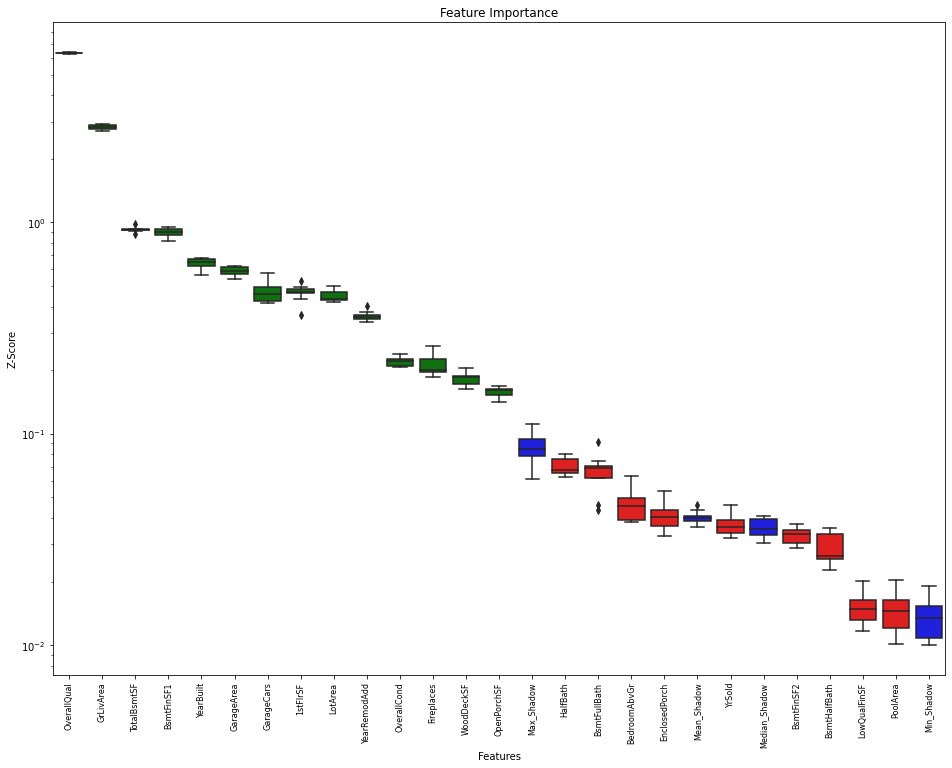

In [4]:
Feature_Selector.plot(which_features='all', figsize=(16,12))

In [5]:
# Return a subset of the original data with the selected features
Feature_Selector.Subset()

,TotalBsmtSF,Fireplaces,GrLivArea,WoodDeckSF,YearBuilt,GarageArea,LotArea,1stFlrSF,OpenPorchSF,OverallCond,BsmtFinSF1,GarageCars,OverallQual,YearRemodAdd
0,856,0,1710,0,2003,548,8450,856,61,5,706,2,7,2003
1,1262,1,1262,298,1976,460,9600,1262,0,8,978,2,6,1976
2,920,1,1786,0,2001,608,11250,920,42,5,486,2,7,2002
3,756,1,1717,0,1915,642,9550,961,35,5,216,3,7,1970
4,1145,1,2198,192,2000,836,14260,1145,84,5,655,3,8,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,953,1,1647,0,1999,460,7917,953,40,5,0,2,6,2000
1456,1542,2,2073,349,1978,500,13175,2073,0,6,790,2,6,1988
1457,1152,2,2340,0,1941,252,9042,1188,60,9,275,1,7,2006
1458,1078,0,1078,366,1950,240,9717,1078,0,6,49,1,5,1996


These results compare well with those obtained both via [recursive feature elimination (RFE)](https://www.kaggle.com/carlmcbrideellis/recursive-feature-elimination-rfe-example) and via [permutation importance](https://www.kaggle.com/carlmcbrideellis/house-prices-permutation-importance-example), both applied to the very same dataset.
### Links:
* [Boruta-Shap](https://github.com/Ekeany/Boruta-Shap) (GitHub)
* [SHAP (SHapley Additive exPlanations)](https://github.com/slundberg/shap) by Scott Lundberg (GitHub)
* [Christoph Molnar "SHAP (SHapley Additive exPlanations)" in "Interpretable Machine Learning: A Guide for Making Black Box Models Explainable"](https://christophm.github.io/interpretable-ml-book/shap.html)
* Miron B. Kursa, Witold R. Rudnicki "Feature Selection with the Boruta Package", Journal of Statistical Software Volume 36, Issue 11 (2010) [doi: 10.18637/jss.v036.i11](https://www.jstatsoft.org/article/view/v036i11) ([pdf](https://www.jstatsoft.org/article/view/v036i11/v36i11.pdf))

**Related notebooks:**

* [Automated feature selection with boruta](https://www.kaggle.com/residentmario/automated-feature-selection-with-boruta) by [Aleksey Bilogur](https://www.kaggle.com/residentmario)
* [Boruta Beats 'em all-New look at Feature Selection](https://www.kaggle.com/ajaysamp/boruta-beats-em-all-new-look-at-feature-selection) by [Ajay Sampath](https://www.kaggle.com/ajaysamp)
* [SHAP Values](https://www.kaggle.com/dansbecker/shap-values) by [DanB](https://www.kaggle.com/dansbecker)
* [Advanced Uses of SHAP values](https://www.kaggle.com/dansbecker/advanced-uses-of-shap-values) by [DanB](https://www.kaggle.com/dansbecker)